# Exemplu de utilizare simultană a mai multor modele pentru a amplifica calitatea detecției

In [1]:
from google.colab import files
from IPython.display import display
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

## Incarcarea modelelor

Modelele reprezinta o serie de fisiere xml in care sunt trecute liste de clasificatori pentru fiecare etapa a cascadei. Acestea sunt relativ usor de gasit pe internet prin cautare dupa numele lor. Mult timp au fost distribuite cu biblioteca opencv dar ultimele versiuni nu le mai au.

In [2]:
print("Upload a face HAAR openCV model (usually named haarcascade_frontalface_default.xml)")
uploaded_face = files.upload()  # Allows user to upload a file
# Get the first uploaded file
model_face_path = list(uploaded_face.keys())[0]

Upload a face HAAR openCV model (usually named haarcascade_frontalface_default.xml)


Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml


In [3]:
print("Upload an eye HAAR openCV model (usually named haarcascade_eye_tree_eyeglasses.xml")
uploaded_eye = files.upload()  # Allows user to upload a file
# Get the first uploaded file
model_eye_path = list(uploaded_eye.keys())[0]

Upload an eye HAAR openCV model (usually named haarcascade_eye_tree_eyeglasses.xml


Saving haarcascade_eye_tree_eyeglasses.xml to haarcascade_eye_tree_eyeglasses.xml


In [4]:
print("Upload an mouth HAAR openCV model usually named haarcascade_mcs_mouth.xml")
uploaded_mouth = files.upload()  # Allows user to upload a file
# Get the first uploaded file
model_mouth_path = list(uploaded_mouth.keys())[0]

Upload an mouth HAAR openCV model usually named haarcascade_mcs_mouth.xml


Saving haarcascade_mcs_mouth.xml to haarcascade_mcs_mouth.xml


In [5]:
print("Upload a nose HAAR openCV model usually named haarcascade_mcs_nose.xml")
uploaded_nose = files.upload()  # Allows user to upload a file
# Get the first uploaded file
model_nose_path = list(uploaded_nose.keys())[0]

Upload a nose HAAR openCV model usually named haarcascade_mcs_nose.xml


Saving haarcascade_mcs_nose.xml to haarcascade_mcs_nose.xml


Saving face_square_512.jpg to face_square_512.jpg


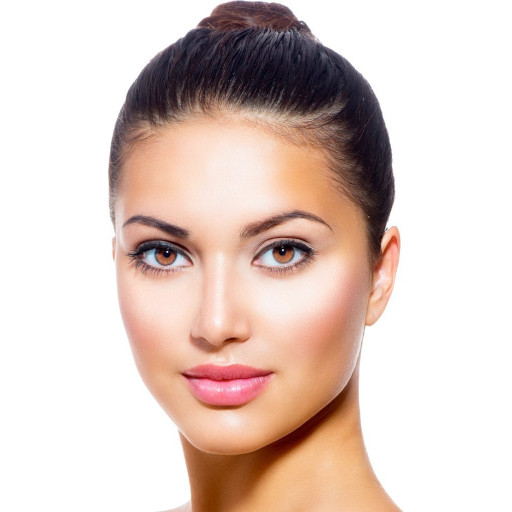

In [6]:
uploaded = files.upload()  # Allows user to upload a file
# Get the first uploaded file
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
if img is not None:
      cv2_imshow(img)

## Initializarea modelelor HAAR

Fiecare tip de detectie are propriul model, separat antrenat, pentru detectia fetei, ochilor, nasului, gurii. Fiecare astfel de model trebuie initializat separat.

In [7]:
print(model_face_path)
print(model_eye_path)
print(model_mouth_path)
print(model_nose_path)


haarcascade_frontalface_default.xml
haarcascade_eye_tree_eyeglasses.xml
haarcascade_mcs_mouth.xml
haarcascade_mcs_nose.xml


In [8]:
haarcascade_face = cv2.CascadeClassifier(model_face_path)
haarcascade_eye = cv2.CascadeClassifier(model_eye_path)
haarcascade_nose = cv2.CascadeClassifier(model_mouth_path)
haarcascade_mouth = cv2.CascadeClassifier(model_nose_path)

## Specificarea parametrilor de detectie

Parametru | Descriere | valoare propusa
----------|-----------|-----------------------
haarScaleFactor_face|Parameter specifying how much the image size is reduced at each image scale for face detection model|1.025)
haarScaleFactor_eye|Parameter specifying how much the image size is reduced at each image scale for eye detection model|1.025)
haarScaleFactor_nose|Parameter specifying how much the image size is reduced at each image scale for nose detection model|1.025)
haarScaleFactor_mouth|Parameter specifying how much the image size is reduced at each image scale for mouth detection model|1.025)
haarMinNeighbours_face|Parameter specifying how many neighbors each candidate rectangle should have to retain it - face detection|25)
haarMinNeighbours_eye|Parameter specifying how many neighbors each candidate rectangle should have to retain it - eye detection|50)
haarMinNeighbours_nose|Parameter specifying how many neighbors each candidate rectangle should have to retain it - nose detection|50)
haarMinNeighbours_mouth|Parameter specifying how many neighbors each candidate rectangle should have to retain it - mouth detection|150)
haarMinSize_face|Minimum possible object size. Objects smaller than that are ignored - face detection.|50)
haarMinSize_eye|Minimum possible object size. Objects smaller than that are ignored - eye detection.|10)
haarMinSize_nose|Minimum possible object size. Objects smaller than that are ignored - nose detection.|10)
haarMinSize_mouth|Minimum possible object size. Objects smaller than that are ignored - mouth detection.|10)

In [9]:
haarScaleFactor_face = 1.025
haarScaleFactor_eye = 1.025
haarScaleFactor_nose = 1.025
haarScaleFactor_mouth = 1.025
haarMinNeighbours_face = 25
haarMinNeighbours_eye = 50
haarMinNeighbours_nose = 50
haarMinNeighbours_mouth = 150
haarMinSize_face = 50
haarMinSize_eye = 10
haarMinSize_nose = 10
haarMinSize_mouth = 10


In [10]:
report={}
report['labels_face'] = []
report['labels_eye'] = []
report['labels_nose'] = []
report['labels_mouth'] = []

## Detectia HAAR se face pe imagini cu tonuri de gri

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


## Detectia fetelor din imagine

In [12]:
hits_face = haarcascade_face.detectMultiScale(
                                gray,
                                scaleFactor=haarScaleFactor_face,
                                minNeighbors=haarMinNeighbours_face,
                                minSize=(haarMinSize_face, haarMinSize_face)
                            )
if len(hits_face) > 0:
    for (x,y,w,h) in hits_face:
        report['labels_face'].append({'x': int(x),'y': int(y),'w': int(w), 'h': int(h)})
    print(f"Detectat {len(hits_face)} fete")

Detectat 1 fete


## Detectia ochilor din imagine

In [13]:
hits_eye = haarcascade_eye.detectMultiScale(
        gray,
        scaleFactor=haarScaleFactor_eye,
        minNeighbors=haarMinNeighbours_eye,
        minSize=(haarMinSize_eye, haarMinSize_eye)
    )

if len(hits_eye) > 0:
  for (x,y,w,h) in hits_eye:
      report['labels_eye'].append({'x': int(x),'y': int(y),'w': int(w), 'h': int(h)})
  print(f"Detectat {len(hits_eye)} ochi")

Detectat 2 ochi


In [14]:
hits_nose = haarcascade_nose.detectMultiScale(
            gray,
            scaleFactor=haarScaleFactor_nose,
            minNeighbors=haarMinNeighbours_nose,
            minSize=(haarMinSize_nose, haarMinSize_nose)
        )

if len(hits_nose) > 0:
    for (x,y,w,h) in hits_nose:
        report['labels_nose'].append({'x': int(x),'y': int(y),'w': int(w), 'h': int(h)})
    print(f"Detectat {len(hits_nose)} nasuri")

Detectat 4 nasuri


In [15]:
hits_mouth = haarcascade_mouth.detectMultiScale(
    gray,
    scaleFactor=haarScaleFactor_mouth,
    minNeighbors=haarMinNeighbours_mouth,
    minSize=(haarMinSize_mouth, haarMinSize_mouth)
)

if len(hits_mouth) > 0:
    for (x,y,w,h) in hits_mouth:
        report['labels_mouth'].append({'x': int(x),'y': int(y),'w': int(w), 'h': int(h)})
    print(f"Detectat {len(hits_mouth)} guri")

Detectat 1 guri


In [16]:
color_face = (0,255,0)
color_eye = (3,186,252)
color_nose = (255,0,0)
color_mouth = (0,0,255)

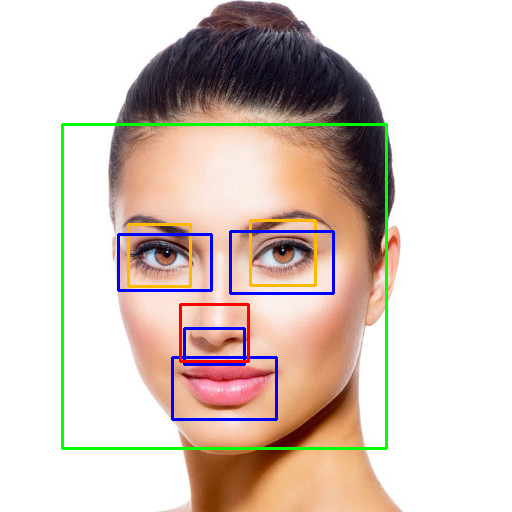

In [17]:
new_img = img.copy()

if 'labels_face' in report:
    for face in report['labels_face']:
        cv2.rectangle(new_img, (face['x'], face['y']), (face['x'] + face['w'], face['y'] + face['h']), color_face, 2)

if 'labels_eye' in report:
    for eye in report['labels_eye']:
        cv2.rectangle(new_img, (eye['x'], eye['y']), (eye['x'] + eye['w'], eye['y'] + eye['h']), color_eye, 2)

if 'labels_nose' in report:
    for nose in report['labels_nose']:
        cv2.rectangle(new_img, (nose['x'], nose['y']), (nose['x'] + nose['w'], nose['y'] + nose['h']), color_nose, 2)

if 'labels_mouth' in report:
    for mouth in report['labels_mouth']:
        cv2.rectangle(new_img, (mouth['x'], mouth['y']), (mouth['x'] + mouth['w'], mouth['y'] + mouth['h']), color_mouth, 2)

cv2_imshow(new_img)